In [2]:
from __future__ import absolute_import, division, print_function
import numpy as np
import keras
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)

Using TensorFlow backend.


In [1]:
from google.colab import drive
drive.mount('/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /drive


In [4]:
%matplotlib inline
(x_train, y_train_num), (x_test, y_test_num)= mnist.load_data()
x_train= x_train.reshape(x_train.shape[0], 28,28,1).astype('float32')
x_test= x_test.reshape(x_test.shape[0], 28,28,1).astype('float32')

x_train /= 255
x_test /= 255

y_train = np_utils.to_categorical(y_train_num,10)
y_test =  np_utils.to_categorical(y_test_num,10)

print('--- THE DATA ---')
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

--- THE DATA ---
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

[]

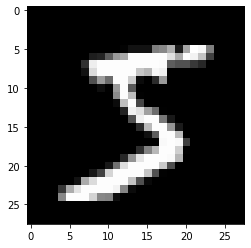

In [6]:
plt.imshow(x_train[0].squeeze(), cmap='gray')
plt.plot()

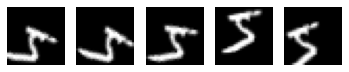

In [7]:
gen = datagen.flow(x_train[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()

In [8]:
 # Define Model
    model3 = Sequential()

    # 1st Conv Layer
    model3.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model3.add(Activation('relu'))

    # 2nd Conv Layer
    model3.add(Convolution2D(32, 3, 3))
    model3.add(Activation('relu'))

    # Max Pooling
    model3.add(MaxPooling2D(pool_size=(2,2)))
    
    # Dropout
    model3.add(Dropout(0.15))

    # Fully Connected Layer
    model3.add(Flatten())
    model3.add(Dense(128))
    model3.add(Activation('relu'))
    
    # More Dropout
    model3.add(Dropout(0.2))

    # Prediction Layer
    model3.add(Dense(10))
    model3.add(Activation('softmax'))

    # Loss and Optimizer
    model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=7, verbose=1, mode='auto')
    callback_list = [early_stopping]






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  


In [9]:
# Fit generator
model3.fit_generator(datagen.flow(x_train, y_train,batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=10,
                    validation_data=(x_test, y_test), callbacks=callback_list)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=10)`
  after removing the cwd from sys.path.





Epoch 1/10





1875/1875 [==============================] - 134s 72ms/step - loss: 0.7580 - acc: 0.7506 - val_loss: 0.1733 - val_acc: 0.9462
Epoch 2/10
1875/1875 [==============================] - 134s 71ms/step - loss: 0.3411 - acc: 0.8932 - val_loss: 0.1284 - val_acc: 0.9602
Epoch 3/10
1875/1875 [==============================] - 134s 72ms/step - loss: 0.2718 - acc: 0.9157 - val_loss: 0.1063 - val_acc: 0.9679
Epoch 4/10
1875/1875 [==============================] - 135s 72ms/step - loss: 0.2285 - acc: 0.9302 - val_loss: 0.1091 - val_acc: 0.9674
Epoch 5/10
1875/1875 [==============================] - 135s 72ms/step - loss: 0.2055 - acc: 0.9367 - val_loss: 0.1000 - val_acc: 0.9705
Epoch 6/10
1875/1875 [==============================] - 135s 72ms/step - loss: 0.1917 - acc: 0.9414 - val_loss: 0.0841 - val_acc: 0.9747
Epoch 7/10
1875/1875 [==============================] - 135s 72ms/step - loss: 0.1774 - acc: 0.9450 - val_loss: 0.0758 - val_acc: 0.9764
Epoch 8/10
1875/1875 [===========

In [10]:
loss_and_metrics = model3.evaluate(x_train, y_train)
print(loss_and_metrics)

60000/60000 [==============================] - 28s 467us/step
[0.07572657547002504, 0.97605]
